# TD1 exo 1 sur le TFSD

Un [corrigé par Lucas marchant](./td1_exo1_corr.jpg) a été proposé.
Voici la version octave.

L'axe des temps est discret donc facilement représentable avec $t=k\,Te$, il suffit de créer un vecteur du temps discret $k$ de -5 à 5 par exemple et de calculer le vecteurs temps $t$ qui y correspond (utile pour l'affichage)



In [10]:
clear all; close all;
% k est le vecteur entier assoicié au temps
k=-5:5
Fe=0.1; 
Te = 1/Fe; 
t=k*Te

k =

  -5  -4  -3  -2  -1   0   1   2   3   4   5

t =

  -50  -40  -30  -20  -10    0   10   20   30   40   50



Dans la TFSD les fréquences sont continues entre 0 et $F_e$ etimpossible à stocker dans un ordinateur.
On s'en rapproche avec une résolution très fine  $\Delta_f=0.001$ 𝐻𝑧 (pare exemple) comparée à la fréquence d'échantillonnage  𝐹𝑒=1  arbitraire. 

On peut choisir d'échantillonner en fréquence avec 1000 points entre 0 et $F_e$ et en déduire la résolution $\Delta_f=\frac{F_e}{1000}$. On peut calculer **inutilement** la TFSD pour des fréquences au delà de $F_e$ pour vérifier la périodicité du spêctre. 

In [13]:
% f est le vecteur "presque" continu des fréquences
Df= Fe/1000 %résolution fine
f=-2*Fe: Df:2*Fe;
NB_points = length(f)

Df =    1.0000e-04
NB_points =  4001


On défini la fonction impulsion unité $\delta_0[k] = 1$ uniquement si $k=0$, elle joue le même rôle que l'impulsion de Dirac. 

Pour cela on aurait pu faire une fichier dirac.m content :
``` octave
function val = dirac(k)
          if k == 0 
              val= 1
          else 
              val = 0
          end
     return val
```     
Mais on profite des *fonctions inline* (fonction en ligne) 

    delta = @(k) *expression de k
    
Pour faire le *si alors sinon* en une seule ligne on peut profiter d'une astuce où un booléen vrai vaut 1 et un faux vaut 0, donc l'expression "k == 0" est un booléen mais aussi une valeur numérique qui convient.

Donc delta est une fonction, pour calcul et affichage on créée un vecteur des échantillons du signal en donnant en argument à la fonction le vecteur entier (ici k) des valeurs à calculer.


In [21]:
% x1 et xl les échantillons des signaux
% sur une fenêtre temporelle "presque" infinie
delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)
x1 = delta(k);
signal_x1=[k ; x1] % pour afficher en texte joli

l=2
xl = delta(k-l); % retardé de l=2 échantillons
signal_xl=[k ; xl]


signal_x1 =

  -5  -4  -3  -2  -1   0   1   2   3   4   5
   0   0   0   0   0   1   0   0   0   0   0

l =  2
signal_xl =

  -5  -4  -3  -2  -1   0   1   2   3   4   5
   0   0   0   0   0   0   0   1   0   0   0



Il suffit ensuite de faire un script TFSD qui fait le calcul pour chaque fréquences contenues dans le vecteur f (supposé être continu de 0 à Fe) avec tout les instants contenu dans k (qui est bien un vecteur d'entiers mais supposé être infini...)
La fonction du script [tfsd](tfsd.m) ressemble beaucoup aux scripts de deuxieme année.

Pour les affichages à gauche temporel, à droite fréquentiel, en haut partie réelle et en bas partie imaginaire, je vous ai fait la fonction plot_dual.m

A vous de mettre les bonnes légendes avec les bonnes sunités.

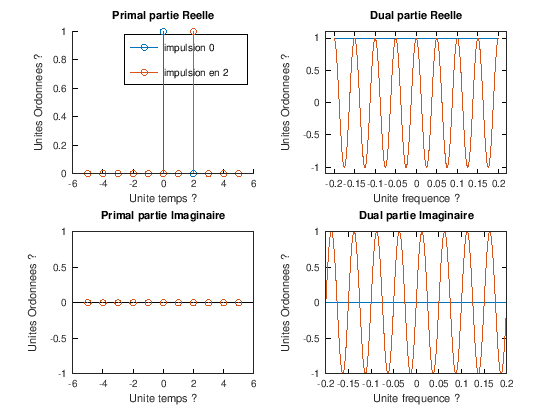

In [36]:
tfsd_x1 = tfsd(x1,k,f,Te); % voir tfsd.m ou help tfsd
tfsd_xl = tfsd(xl,k,f,Te);

plot_dual([k; k],"Unite temps ?",
        [x1;xl],"Unites Ordonnees ?",
        [f;f],"Unite frequence ?",
        [tfsd_x1; tfsd_xl],"Unites Ordonnees ?",
        ["impulsion 0";"impulsion en 2"],
        primalDiscret=true,
        dualDiscret=false);
subplot(222);axis(axis*1.1) % bug d'affichage et le 1 était invisible

On donc bien tfsd$[\delta_0][n]= 1$ et tfsd$[\delta_2][n]= e^{-i\,2\pi\,f\;2T_e}$

On peut vérifier autrement qu'à l'oeil, en calculant l'énergie de l'erreur entre le calcul et la formule

In [42]:
erreur = tfsd_xl - exp(i*2*pi*f*2*Te);
norme_carre_erreur = erreur * conj(erreur') % Le produit scalaire complexe des fonctions <<f,f>> 

norme_carre_erreur = -8000.0


Oups j'ai oublié le - dans la formule !

In [43]:
erreur = tfsd_xl - exp(    -    i*2*pi*f*2*Te);
norme_carre_erreur = erreur * conj(erreur') % Le produit scalaire complexe des fonctions <<f,f>> 

norme_carre_erreur = 0
